# Justin Zarkovacki CS-4820
## 9/20/2022

### Required imports

In [1]:
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, AveragePooling2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Rescaling
from keras import Input, models, backend as K

print("Done!")

Done!


### Create Function Definintions and Variables

In [2]:
batch_size = 128
epochs = 12
img_rows, img_cols = 28, 28  # Image dimensions

def load(f):
    return np.load(f)['arr_0']

# Generate a model based on the number of classes in the output layer
def generate_model(num_of_classes, input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding="valid"))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
    model.add(Flatten())
    model.add(Dense(num_of_classes, activation='relu'))
    model.add(Dense(num_of_classes))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer="adam",
                  metrics=['accuracy'])
    
    return model
    
def initialize_data(train_im_file, test_im_file, train_lb_file, test_lb_file):
    train_images = load(train_im_file)
    test_images = load(test_im_file)
    train_labels = load(train_lb_file)
    test_labels = load(test_lb_file)
    
    if K.image_data_format() == 'channels_first':
        train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
        test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
        test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    train_images = train_images.astype('float32')
    test_images = test_images.astype('float32')
    train_images /= 255
    test_images /= 255
    print('{} train samples, {} test samples'.format(len(train_images), len(test_images)))
    
    return tuple([train_images, test_images, train_labels, test_labels, input_shape])

# Helper to create the graphics
def create_visuals(graph_title, model_hist, test_images, test_labels):
    accuracy_data = model_hist.history['accuracy']
    val_accuracy_data = model_hist.history['val_accuracy']

    lower_bound = min(min(accuracy_data), min(val_accuracy_data))

    plt.plot(accuracy_data, label='Train Accuracy')
    plt.plot(val_accuracy_data, label = 'Validation Accuracy')

    plt.title(graph_title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([lower_bound - 0.01, 1])
    plt.legend(loc='lower right')

    print(accuracy_data[-1])
    print(val_accuracy_data[-1])
#     test_loss, test_acc = model_hist.evaluate(test_images, test_labels, verbose=2)

print("Done!")

Done!


### Initialize training/test datasets and other important variables

In [3]:
prefix = '..\..\Datasets\\'
datasets = {
    "km_tr_i" : prefix + 'Kuzushiji-MNIST - train-imgs.npz',
    "km_te_i" : prefix + 'Kuzushiji-MNIST - test-imgs.npz',
    "km_tr_l" : prefix + 'Kuzushiji-MNIST - train-labels.npz',
    "km_te_l" : prefix + 'Kuzushiji-MNIST - test-labels.npz',
    "k49_tr_i" : prefix + 'Kuzushiji-49 - train-imgs.npz',
    "k49_te_i" : prefix + 'Kuzushiji-49 - test-imgs.npz',
    "k49_tr_l" : prefix + 'Kuzushiji-49 - train-labels.npz',
    "k49_te_l" : prefix + 'Kuzushiji-49 - test-labels.npz',
    "kanji" : prefix + 'midterm_dataset',
}

# Load MNIST Data
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_input_shape = (28, 28, 1)

# Load KMNIST Data
dataset = initialize_data(datasets["km_tr_i"], datasets["km_te_i"], datasets["km_tr_l"], datasets["km_te_l"])
kmnist_train_images = dataset[0]
kmnist_test_images = dataset[1]
kmnist_train_labels = dataset[2]
kmnist_test_labels  = dataset[3]
kmnist_input_shape = dataset[4]

# Load Kuzushiji-49 Data
dataset = initialize_data(datasets["k49_tr_i"], datasets["k49_te_i"], datasets["k49_tr_l"], datasets["k49_te_l"])
k49_train_images = dataset[0]
k49_test_images = dataset[1]
k49_train_labels = dataset[2]
k49_test_labels  = dataset[3]
k49_input_shape = dataset[4]

# Load Kanji Data
kanji_input_shape = (64, 64, 3)
kanji_dataset_train = tf.keras.utils.image_dataset_from_directory(datasets["kanji"], validation_split=0.3,
                        seed=222, subset="training", image_size=(64, 64), batch_size=32)

kanji_dataset_val = tf.keras.utils.image_dataset_from_directory(datasets["kanji"], validation_split=0.3,
                        seed=222, subset="validation", image_size=(64, 64), batch_size=32)

print("Done!")

60000 train samples, 10000 test samples
232365 train samples, 38547 test samples
Found 40857 files belonging to 50 classes.
Using 28600 files for training.
Found 40857 files belonging to 50 classes.
Using 12257 files for validation.
Done!


### Create Model - MNIST

In [10]:
num_classes = 10
mnist_model = generate_model(num_classes, mnist_input_shape)
mnist_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                92170     
                                                      

### Run Model - MNIST

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

mnist_history = mnist_model.fit(mnist_train_images, mnist_train_labels, batch_size=batch_size,
                                epochs=epochs, callbacks=callback, verbose=1,
                                validation_data=(mnist_test_images, mnist_test_labels))

mnist_model.save('justin_mnist_model')

Epoch 1/12
469/469 [==============================] - 70s 148ms/step - loss: 1.8707 - accuracy: 0.3136 - val_loss: 1.5618 - val_accuracy: 0.4043
Epoch 2/12
469/469 [==============================] - 69s 147ms/step - loss: 1.4757 - accuracy: 0.4221 - val_loss: 1.3951 - val_accuracy: 0.4645
Epoch 3/12
469/469 [==============================] - 70s 148ms/step - loss: 1.2457 - accuracy: 0.5022 - val_loss: 1.0924 - val_accuracy: 0.5698
Epoch 4/12
469/469 [==============================] - 71s 150ms/step - loss: 1.0550 - accuracy: 0.5791 - val_loss: 1.0051 - val_accuracy: 0.5934
Epoch 5/12
469/469 [==============================] - 71s 151ms/step - loss: 0.9296 - accuracy: 0.6392 - val_loss: 0.7429 - val_accuracy: 0.7452
Epoch 6/12
469/469 [==============================] - 71s 152ms/step - loss: 0.5862 - accuracy: 0.7947 - val_loss: 0.4806 - val_accuracy: 0.8394
Epoch 7/12
469/469 [==============================] - 73s 156ms/step - loss: 0.3255 - accuracy: 0.9111 - val_loss: 0.1975 - val_ac

### Visualize Results - MNIST

0.9733833074569702
0.968500018119812


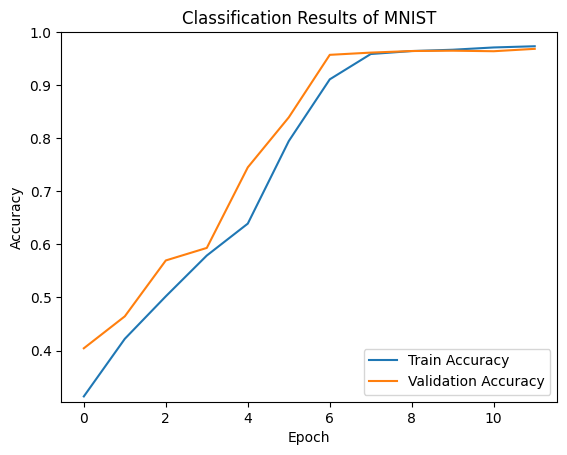

In [12]:
create_visuals("Classification Results of MNIST", mnist_history, mnist_test_images, mnist_test_labels)

### Create Model - KMNIST

In [13]:
num_classes = 10
kmnist_model = generate_model(num_classes, kmnist_input_shape)
kmnist_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_3 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d_3 (Averag  (None, 12, 12, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                92170     
                                                      

### Run Model - KMNIST

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

kmnist_history = kmnist_model.fit(kmnist_train_images, kmnist_train_labels, batch_size=batch_size, 
              epochs=epochs, callbacks=callback, verbose=1,
                                  validation_data=(kmnist_test_images, kmnist_test_labels))

kmnist_model.save('justin_kmnist_model')

Epoch 1/12
469/469 [==============================] - 68s 142ms/step - loss: 0.7424 - accuracy: 0.7639 - val_loss: 0.7961 - val_accuracy: 0.7576
Epoch 2/12
469/469 [==============================] - 70s 149ms/step - loss: 0.3116 - accuracy: 0.9096 - val_loss: 0.6608 - val_accuracy: 0.8062
Epoch 3/12
469/469 [==============================] - 71s 151ms/step - loss: 0.2364 - accuracy: 0.9313 - val_loss: 0.5054 - val_accuracy: 0.8551
Epoch 4/12
469/469 [==============================] - 71s 151ms/step - loss: 0.1899 - accuracy: 0.9445 - val_loss: 0.4610 - val_accuracy: 0.8677
Epoch 5/12
469/469 [==============================] - 72s 154ms/step - loss: 0.1562 - accuracy: 0.9548 - val_loss: 0.4264 - val_accuracy: 0.8819
Epoch 6/12
469/469 [==============================] - 74s 158ms/step - loss: 0.1354 - accuracy: 0.9604 - val_loss: 0.3901 - val_accuracy: 0.8904
Epoch 7/12
469/469 [==============================] - 72s 154ms/step - loss: 0.1163 - accuracy: 0.9659 - val_loss: 0.3976 - val_ac

### Visualize Results - KMNIST

0.9821666479110718
0.9092000126838684


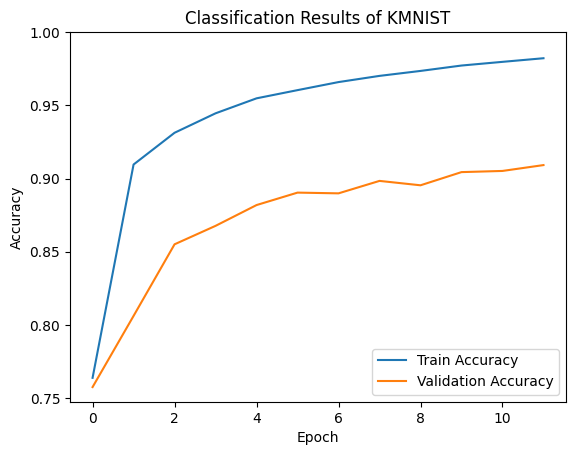

In [18]:
create_visuals("Classification Results of KMNIST", kmnist_history, kmnist_test_images, kmnist_train_labels)

### Create Model - Kuzushiji-49

In [5]:
num_classes = 49
k49_model = generate_model(num_classes, k49_input_shape)
k49_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 64)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 49)                451633    
                                                        

### Run Model - Kuzushiji-49

In [6]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

k49_history = k49_model.fit(k49_train_images, k49_train_labels, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=(k49_test_images, k49_test_labels))

k49_model.save('justin_k49_model')

Epoch 1/12
1816/1816 [==============================] - 562s 309ms/step - loss: 0.7651 - accuracy: 0.8037 - val_loss: 0.7679 - val_accuracy: 0.8040
Epoch 2/12
1816/1816 [==============================] - 588s 324ms/step - loss: 0.3486 - accuracy: 0.9062 - val_loss: 0.5953 - val_accuracy: 0.8491
Epoch 3/12
1816/1816 [==============================] - 542s 299ms/step - loss: 0.2572 - accuracy: 0.9295 - val_loss: 0.5101 - val_accuracy: 0.8702
Epoch 4/12
1816/1816 [==============================] - 508s 280ms/step - loss: 0.2021 - accuracy: 0.9444 - val_loss: 0.4697 - val_accuracy: 0.8830
Epoch 5/12
1816/1816 [==============================] - 450s 248ms/step - loss: 0.1638 - accuracy: 0.9541 - val_loss: 0.4621 - val_accuracy: 0.8883
Epoch 6/12
1816/1816 [==============================] - 448s 247ms/step - loss: 0.1328 - accuracy: 0.9621 - val_loss: 0.4544 - val_accuracy: 0.8927
Epoch 7/12
1816/1816 [==============================] - 448s 247ms/step - loss: 0.1097 - accuracy: 0.9681 - val_

### Vizualize Results - Kuzushiji-49

0.9767478108406067
0.8910939693450928


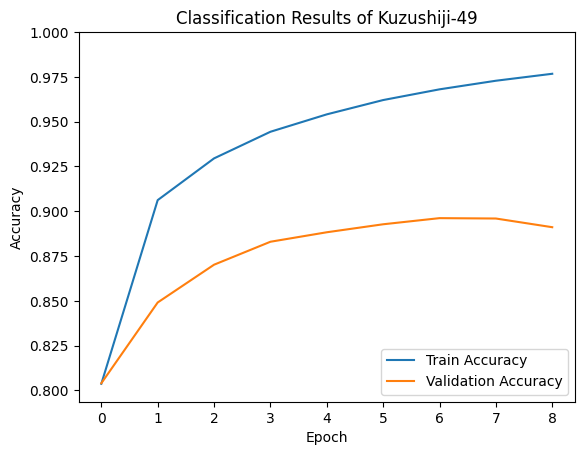

In [7]:
create_visuals("Classification Results of Kuzushiji-49", k49_history, k49_test_images, k49_train_labels)

### Prepare Dataset - Kanji

(32, 64, 64, 3)
(32,)
0.0 1.0


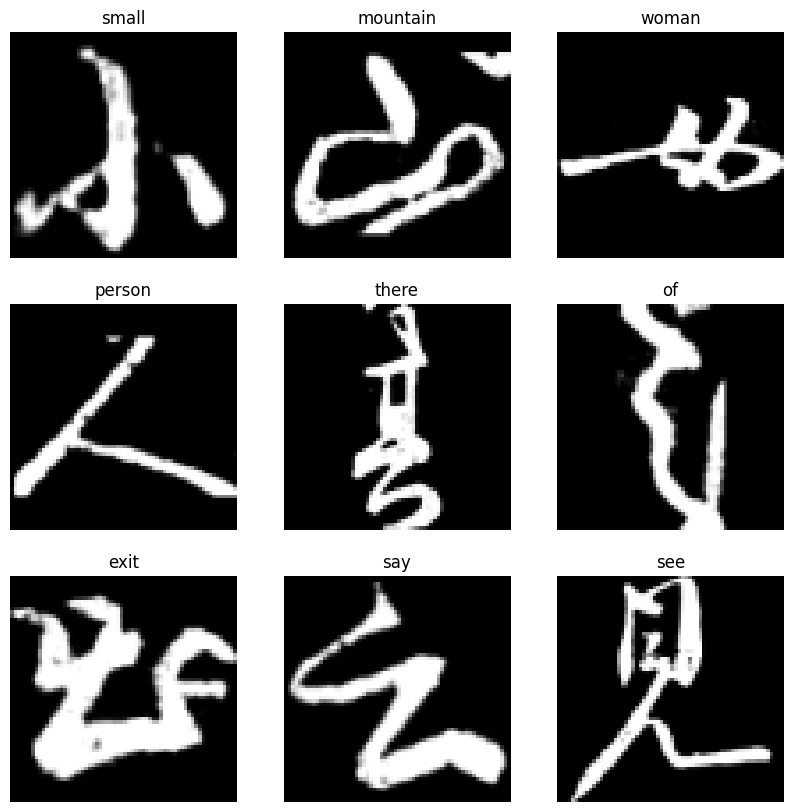

In [8]:
# Load classes
class_names = kanji_dataset_train.class_names

# Show some data to prove load worked
plt.figure(figsize=(10, 10))
for images, labels in kanji_dataset_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for image_batch, labels_batch in kanji_dataset_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
    
# Rescale Data
normalization_layer = Rescaling(1./255)
normalized_ds = kanji_dataset_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image)) # Notice the pixel values are now in `[0,1]`.

# Training performane optimizations
AUTOTUNE = tf.data.AUTOTUNE

train_ds = kanji_dataset_train.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = kanji_dataset_val.cache().prefetch(buffer_size=AUTOTUNE)

### Create Model - Kanji

In [9]:
num_classes = 50
kanji_model = generate_model(num_classes, kanji_input_shape)
kanji_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 50)                2880050   
                                                      

### Run Model - Kanji

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

kanji_history = kanji_model.fit(kanji_dataset_train, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=kanji_dataset_val)

kanji_model.save('justin_kanji_model')

Epoch 1/12
894/894 [==============================] - 251s 280ms/step - loss: 2.8717 - accuracy: 0.4728 - val_loss: 1.1666 - val_accuracy: 0.7001
Epoch 2/12
894/894 [==============================] - 256s 286ms/step - loss: 0.6628 - accuracy: 0.8270 - val_loss: 0.6769 - val_accuracy: 0.8254
Epoch 3/12
894/894 [==============================] - 253s 283ms/step - loss: 0.3000 - accuracy: 0.9159 - val_loss: 0.6459 - val_accuracy: 0.8504
Epoch 4/12
894/894 [==============================] - 253s 282ms/step - loss: 0.1613 - accuracy: 0.9542 - val_loss: 0.6918 - val_accuracy: 0.8464
Epoch 5/12
894/894 [==============================] - 255s 285ms/step - loss: 0.1286 - accuracy: 0.9600 - val_loss: 0.8239 - val_accuracy: 0.8486
Epoch 6/12
894/894 [==============================] - 267s 298ms/step - loss: 0.1006 - accuracy: 0.9694 - val_loss: 0.8303 - val_accuracy: 0.8507
INFO:tensorflow:Assets written to: justin_kanji_model\assets


### Visualize Results - Kanji

0.9694405794143677
0.8506975769996643


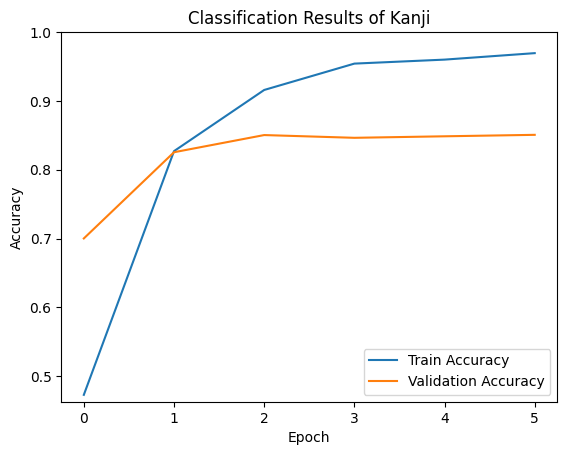

In [11]:
create_visuals("Classification Results of Kanji", kanji_history, kanji_dataset_val, kanji_dataset_val)

## Transfer Learning on the Final Dataset

### Modifying the Kanji Images

In [13]:
# The original Kanji dataset contains images that are 64x64. Since we are transferring the learning
#   from models that trained on 28x28 images, the Kanji images must be downscaled accordingly.
import os
import random
from skimage.transform import rescale
from skimage import io

def attempt_load(name):
    if os.path.isdir(name):
        return models.load_model(name)
    else:
        print(f"Invalid model name {name}")
        
# Returns a list of the names of the copied directories 
def replicate_folder_structure(original_data, write_path):
    for root, directory, files in os.walk(original_data):
        for direc in directory:
            os.mkdir(write_path + '\\' + direc)

# Scale the image to the desired size
def rescale_image(load_path, save_path, image_scale):
    kanji_char = io.imread(load_path)
    rescaled_image = rescale(kanji_char, image_scale, anti_aliasing=True, clip=True)
    io.imsave(save_path, rescaled_image)

In [ ]:
# # NOTE: This code only needs to be run a single time to generate a smaller copy of the original dataset
# image_scale_factor = 28/64
# original_dataset = '..\..\Datasets\\final_dataset'
# write_filepath = '..\..\Datasets\\modified_final_dataset'

# if not os.path.exists(write_filepath):
#     os.mkdir(write_filepath)
#     replicate_folder_structure(original_dataset, write_filepath)

# # Now resize every image and save it in the new folder
# for directory in os.walk(original_dataset):
#     for file in directory[2]:
#         if file.endswith(".png"):
#             current_dir = directory[0].split('\\')[-1]                      # Find the current directory
#             load_path = directory[0] + '\\' + file                          # Generate load path..
#             save_path = write_filepath + '\\' + current_dir + '\\' + file   # .. and save path with current directory
#             rescale_image(load_path, save_path, image_scale_factor)

### Load the Newly Modified Dataset

In [18]:
prefix = '..\..\Datasets\\'
data_path = prefix + 'modified_final_dataset'
mod_size = (28, 28)

mod_kanji_train_final = tf.keras.utils.image_dataset_from_directory(data_path, validation_split=0.3,
                        seed=222, subset="training", color_mode="grayscale", image_size=mod_size, batch_size=32)

mod_kanji_val_final = tf.keras.utils.image_dataset_from_directory(data_path, validation_split=0.3,
                        seed=222, subset="validation", color_mode="grayscale", image_size=mod_size, batch_size=32)

print("Done!")

Found 70599 files belonging to 150 classes.
Using 49420 files for training.
Found 70599 files belonging to 150 classes.
Using 21179 files for validation.
Done!


### Load a Base Model and Freeze all Layers

In [16]:
k49_base_model = attempt_load('justin_k49_model')

# Since the last 3 layers of the base model are Flattening and Dense layers, those need to be popped
k49_base_model.pop()
k49_base_model.pop()
k49_base_model.pop()
k49_base_model.trainable = False

k49_base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 64)       0         
 ooling2D)                                                       
                                                                 
Total params: 18,816
Trainable params: 0
Non-trainable params: 18,816
_________________________________________________________________


### Create a Top Model on Your Base

In [17]:
mod_kanji_input_shape = (28, 28, 1)

tl_model = Sequential()
tl_model.add(k49_base_model)                              # Base..
tl_model.add(Conv2D(32, kernel_size=(3, 3),               # ..everything else
                 activation='relu',
                 name = "test_conv",
                 input_shape=mod_kanji_input_shape))
tl_model.add(Dropout(0.25))
tl_model.add(Conv2D(64, (3, 3), activation='relu'))
tl_model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding="valid"))
tl_model.add(Flatten())
tl_model.add(Dense(150))

tl_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 12, 12, 64)        18816     
                                                                 
 test_conv (Conv2D)          (None, 10, 10, 32)        18464     
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 64)          18496     
                                                                 
 average_pooling2d (AverageP  (None, 4, 4, 64)         0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                      

### Train the New Model

In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tl_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer="adam",
                  metrics=['accuracy'])

tl_history = tl_model.fit(mod_kanji_train_final, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=mod_kanji_val_final)

# tl_model.save("tl_model.h5", save_format='h5')

Epoch 1/12
1545/1545 [==============================] - 72s 46ms/step - loss: 0.3035 - accuracy: 0.9385 - val_loss: 0.5977 - val_accuracy: 0.9075
Epoch 2/12
1545/1545 [==============================] - 75s 48ms/step - loss: 0.3191 - accuracy: 0.9372 - val_loss: 0.6581 - val_accuracy: 0.8968
Epoch 3/12
1545/1545 [==============================] - 77s 50ms/step - loss: 0.3071 - accuracy: 0.9403 - val_loss: 0.6477 - val_accuracy: 0.9097
Epoch 4/12
1545/1545 [==============================] - 87s 56ms/step - loss: 0.3144 - accuracy: 0.9425 - val_loss: 0.7653 - val_accuracy: 0.9070


0.9657011032104492
0.9580608010292053


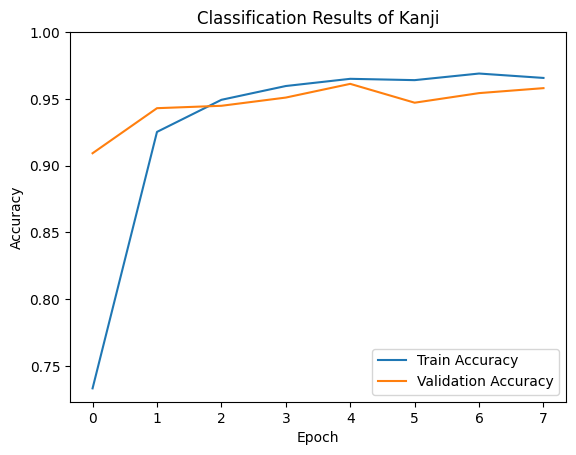

In [9]:
create_visuals("Classification Results of Kanji", tl_history, kanji_dataset_val, kanji_dataset_val)

In [ ]:
# # Use this when you want to load your model
# test_load = tf.keras.models.load_model('tl_model.h5')

# # If you have custom objects that you need to load...
# # test_laod = tf.keras.models.load_model('basic_tl_model.h5', custom_objects={'ObjectName': Object})

# test_load.summary()

### Creating a Better Base Model

In [9]:
num_classes = 49

k49_2 = Sequential()
k49_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=k49_input_shape))
k49_2.add(Conv2D(64, (3, 3), activation='relu', input_shape=k49_input_shape))
k49_2.add(Dropout(0.25))
k49_2.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding="valid"))
k49_2.add(Conv2D(48, (3, 3), activation='relu', input_shape=k49_input_shape))
k49_2.add(Flatten())
k49_2.add(Dense(num_classes, activation='relu'))
k49_2.add(Dense(num_classes))

k49_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=['accuracy'])

k49_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 48)        27696     
                                                                 
 flatten_2 (Flatten)         (None, 4800)              0         
                                                      

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

k49_2_history = k49_2.fit(k49_train_images, k49_train_labels, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=(k49_test_images, k49_test_labels))

# k49_2.save('k49_2_model')

Epoch 1/12
1816/1816 [==============================] - 416s 228ms/step - loss: 0.5942 - accuracy: 0.8454 - val_loss: 0.5555 - val_accuracy: 0.8550
Epoch 2/12
1816/1816 [==============================] - 412s 227ms/step - loss: 0.2302 - accuracy: 0.9373 - val_loss: 0.4256 - val_accuracy: 0.8901
Epoch 3/12
1816/1816 [==============================] - 412s 227ms/step - loss: 0.1663 - accuracy: 0.9534 - val_loss: 0.3823 - val_accuracy: 0.9066
Epoch 4/12
1816/1816 [==============================] - 423s 233ms/step - loss: 0.1308 - accuracy: 0.9626 - val_loss: 0.3746 - val_accuracy: 0.9083
Epoch 5/12
1816/1816 [==============================] - 398s 219ms/step - loss: 0.1066 - accuracy: 0.9690 - val_loss: 0.3738 - val_accuracy: 0.9141
Epoch 6/12
1816/1816 [==============================] - 375s 207ms/step - loss: 0.0883 - accuracy: 0.9731 - val_loss: 0.3953 - val_accuracy: 0.9130
Epoch 7/12
1816/1816 [==============================] - 418s 230ms/step - loss: 0.0756 - accuracy: 0.9765 - val_

In [14]:
final_base = attempt_load("k49_2_model")
final_base.pop()
final_base.pop()
final_base.pop()
final_base.trainable = False

final_base.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 48)        27696     
                                                                 
Total params: 46,512
Trainable params: 0
Non-trainable params: 46,512
__________________________________________________

In [38]:
in_shape = (28, 28, 1)

final_tl_test = Sequential()
final_tl_test.add(final_base)                              # Base..
final_tl_test.add(Conv2D(48, (3, 3), activation='sigmoid', input_shape=in_shape))
final_tl_test.add(AveragePooling2D(pool_size=(2, 2)))
final_tl_test.add(Dropout(0.2))
final_tl_test.add(Conv2D(32, (3, 3), activation='sigmoid'))
final_tl_test.add(Flatten())
final_tl_test.add(Dense(150, activation='relu'))
final_tl_test.add(Dense(150))

final_tl_test.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 48)          20784     
                                                                 
 average_pooling2d_4 (Averag  (None, 4, 4, 48)         0         
 ePooling2D)                                                     
                                                                 
 dropout_8 (Dropout)         (None, 4, 4, 48)          0         
                                                                 
 conv2d_24 (Conv2D)          (None, 2, 2, 32)          13856     
                                                                 
 flatten_7 (Flatten)         (None, 128)               0         
                                                      

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

final_tl_test.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer="adam",
                  metrics=['accuracy'])

final_test_history = final_tl_test.fit(final_train, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=final_val)

# final_tl_test.save('best_k49_tl_model.h5', save_format='h5')

Epoch 1/12
1545/1545 [==============================] - 48s 31ms/step - loss: 2.1411 - accuracy: 0.5249 - val_loss: 0.9241 - val_accuracy: 0.7675
Epoch 2/12
1545/1545 [==============================] - 53s 34ms/step - loss: 0.8146 - accuracy: 0.7937 - val_loss: 0.6053 - val_accuracy: 0.8427
Epoch 3/12
1545/1545 [==============================] - 53s 34ms/step - loss: 0.6138 - accuracy: 0.8397 - val_loss: 0.4983 - val_accuracy: 0.8705
Epoch 4/12
1545/1545 [==============================] - 54s 35ms/step - loss: 0.5168 - accuracy: 0.8637 - val_loss: 0.4304 - val_accuracy: 0.8871
Epoch 5/12
1545/1545 [==============================] - 52s 34ms/step - loss: 0.4585 - accuracy: 0.8774 - val_loss: 0.3937 - val_accuracy: 0.8957
Epoch 6/12
1545/1545 [==============================] - 53s 35ms/step - loss: 0.4191 - accuracy: 0.8883 - val_loss: 0.3610 - val_accuracy: 0.9045
Epoch 7/12
1545/1545 [==============================] - 61s 40ms/step - loss: 0.3845 - accuracy: 0.8979 - val_loss: 0.3436 -

### Optuna Model


In [16]:
import numpy as np
import tensorflow as tf
import os
import optuna
import random

import matplotlib.pyplot as plt

from tensorflow.keras import layers, models

print("Done!")

Done!


In [17]:
prefix = '..\..\Datasets\\'
data_path = prefix + 'modified_final_dataset'
mod_size = (28, 28)

final_train = tf.keras.utils.image_dataset_from_directory(data_path, validation_split=0.3,
                        seed=222, subset="training", color_mode="grayscale", image_size=mod_size, batch_size=32)

final_val = tf.keras.utils.image_dataset_from_directory(data_path, validation_split=0.3,
                        seed=222, subset="validation", color_mode="grayscale", image_size=mod_size, batch_size=32)

print("Done!")

Found 70599 files belonging to 150 classes.
Using 49420 files for training.
Found 70599 files belonging to 150 classes.
Using 21179 files for validation.
Done!


#### Data Rescaling

In [18]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = final_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


#### Training Performance Optimizations

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

final_train = final_train.cache().prefetch(buffer_size=AUTOTUNE)
final_val = final_val.cache().prefetch(buffer_size=AUTOTUNE)
print("Done!")

Done!


### Hyperparameter Tuning

In [ ]:
def load_base_model():
    bm = tf.keras.models.load_model('even_better_base.h5')
    bm.pop()
    bm.pop()
    bm.pop()
    bm.trainable = False
    return bm
    

def objective(trial):
    # The following is where you suggest your search space per trial (integer, categorical and floating point values)
    l1_filters = trial.suggest_int('first_layer_kernel', 16, 64)
    l1_activation = trial.suggest_categorical('first_layer_activation', ['relu', 'sigmoid', 'tanh'])
    l2_filters = trial.suggest_int('second_layer_kernel', 16, 64)
    l2_activation = trial.suggest_categorical('second_layer_activation', ['relu', 'sigmoid', 'tanh'])
    average_pooling_size = trial.suggest_int('average_pooling_size', 2, 2)
#     l3_filters = trial.suggest_int('third_layer_kernel', 16, 64)
#     l3_activation = trial.suggest_categorical('third_layer_activation', ['relu', 'sigmoid', 'tanh'])
    dense_layer_size = trial.suggest_int('dense_layer_size', 32, 128)
    dense_layer_activation = trial.suggest_categorical('dense_layer_activation', ['relu', 'sigmoid', 'tanh'])
    
    # Based on the optuna variables returned you can build a new architecture
    # Load the frozen base model
    base_model = load_base_model()
    mod_kanji_input_shape = (28, 28, 1)
    
    model = Sequential()
    model.add(ba_m)
    model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=my_shape))
    model.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=my_shape))
    model.add(AveragePooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation="sigmoid"))
    model.add(Dense(150))

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalCrossentropy(), 'accuracy'])

    model.summary()

    callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

    history = model.fit(final_train, epochs=15,
                    callbacks=callback, validation_data=final_val)

    # Following line is very important as this is the metric that optuna uses to optimize over
    return history.history['val_accuracy'][-1]

# Run a study
study4 = optuna.create_study(direction='maximize', study_name="Study4")
study4.optimize(objective, n_trials=15)
    

In [39]:
print(f'Best trial info:\n{study.best_trial}\n')
for param, value in study.best_params.items():
    print(f'Param: {param}\tValue: {value}')

Best trial info:
FrozenTrial(number=8, values=[0.8994758725166321], datetime_start=datetime.datetime(2022, 11, 27, 1, 59, 20, 924670), datetime_complete=datetime.datetime(2022, 11, 27, 2, 32, 47, 748629), params={'first_layer_kernel': 47, 'first_layer_activation': 'relu', 'second_layer_kernel': 50, 'second_layer_activation': 'relu', 'average_pooling_size': 2, 'dense_layer_size': 77, 'dense_layer_activation': 'relu'}, distributions={'first_layer_kernel': IntDistribution(high=64, log=False, low=16, step=1), 'first_layer_activation': CategoricalDistribution(choices=('relu', 'sigmoid', 'tanh')), 'second_layer_kernel': IntDistribution(high=64, log=False, low=16, step=1), 'second_layer_activation': CategoricalDistribution(choices=('relu', 'sigmoid', 'tanh')), 'average_pooling_size': IntDistribution(high=2, log=False, low=2, step=1), 'dense_layer_size': IntDistribution(high=128, log=False, low=32, step=1), 'dense_layer_activation': CategoricalDistribution(choices=('relu', 'sigmoid', 'tanh'))}

In [45]:
def load_base_model():
#     bm = tf.keras.models.load_model('k49_2_model')
    bm = attempt_load('k49_2_model')
    bm.pop()
    bm.pop()
    bm.pop()
    bm.trainable = False
    return bm
    

def objective(trial):
    # The following is where you suggest your search space per trial (integer, categorical and floating point values)
    l1_filters = trial.suggest_int('first_layer_kernel', 48, 64)
    l1_activation = trial.suggest_categorical('first_layer_activation', ['relu', 'sigmoid', 'tanh'])
    l2_filters = trial.suggest_int('second_layer_kernel', 28, 44)
    l2_activation = trial.suggest_categorical('second_layer_activation', ['relu', 'sigmoid', 'tanh'])
    average_pooling_size = trial.suggest_int('average_pooling_size', 2, 2)
    dense_layer_size = trial.suggest_int('dense_layer_size', 140, 180)
    dense_layer_activation = trial.suggest_categorical('dense_layer_activation', ['relu', 'sigmoid', 'tanh'])
    
    # Load the frozen base model
    base_model = load_base_model()
    mod_in_shape = (28, 28, 1)
    
    model = Sequential()
    model.add(base_model)
    model.add(Conv2D(l1_filters, (3, 3), activation=l1_activation, input_shape=mod_in_shape))
    model.add(AveragePooling2D((average_pooling_size, average_pooling_size)))
    model.add(Dropout(0.2))
    model.add(Conv2D(l2_filters, (3, 3), activation=l2_activation, input_shape=mod_in_shape))
    model.add(Flatten())
    model.add(Dense(dense_layer_size, activation=dense_layer_activation))
    model.add(Dense(150))

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalCrossentropy(), 'accuracy'])

    print(model.summary())

    callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

    history = model.fit(final_train, epochs=14,
                    callbacks=callback, validation_data=final_val)

    # Following line is very important as this is the metric that optuna uses to optimize over
    return history.history['val_accuracy'][-1]

# Run a study
study2 = optuna.create_study(direction='maximize', study_name="Study3")
study2.optimize(objective, n_trials=15)
    

[I 2022-11-28 20:30:06,611] A new study created in memory with name: Study3


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 59)          25547     
                                                                 
 average_pooling2d_7 (Averag  (None, 4, 4, 59)         0         
 ePooling2D)                                                     
                                                                 
 dropout_11 (Dropout)        (None, 4, 4, 59)          0         
                                                                 
 conv2d_30 (Conv2D)          (None, 2, 2, 35)          18620     
                                                                 
 flatten_8 (Flatten)         (None, 140)               0         
                                                     

[I 2022-11-28 20:48:43,759] Trial 0 finished with value: 0.9350299835205078 and parameters: {'first_layer_kernel': 59, 'first_layer_activation': 'sigmoid', 'second_layer_kernel': 35, 'second_layer_activation': 'sigmoid', 'average_pooling_size': 2, 'dense_layer_size': 169, 'dense_layer_activation': 'tanh'}. Best is trial 0 with value: 0.9350299835205078.


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 50)          21650     
                                                                 
 average_pooling2d_8 (Averag  (None, 4, 4, 50)         0         
 ePooling2D)                                                     
                                                                 
 dropout_12 (Dropout)        (None, 4, 4, 50)          0         
                                                                 
 conv2d_32 (Conv2D)          (None, 2, 2, 37)          16687     
                                                                 
 flatten_9 (Flatten)         (None, 148)               0         
                                                     

[I 2022-11-28 21:09:25,535] Trial 1 finished with value: 0.9285141229629517 and parameters: {'first_layer_kernel': 50, 'first_layer_activation': 'tanh', 'second_layer_kernel': 37, 'second_layer_activation': 'sigmoid', 'average_pooling_size': 2, 'dense_layer_size': 145, 'dense_layer_activation': 'relu'}. Best is trial 0 with value: 0.9350299835205078.


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_33 (Conv2D)          (None, 8, 8, 63)          27279     
                                                                 
 average_pooling2d_9 (Averag  (None, 4, 4, 63)         0         
 ePooling2D)                                                     
                                                                 
 dropout_13 (Dropout)        (None, 4, 4, 63)          0         
                                                                 
 conv2d_34 (Conv2D)          (None, 2, 2, 36)          20448     
                                                                 
 flatten_10 (Flatten)        (None, 144)               0         
                                                     

[I 2022-11-28 21:29:10,793] Trial 2 finished with value: 0.9354549050331116 and parameters: {'first_layer_kernel': 63, 'first_layer_activation': 'sigmoid', 'second_layer_kernel': 36, 'second_layer_activation': 'sigmoid', 'average_pooling_size': 2, 'dense_layer_size': 152, 'dense_layer_activation': 'tanh'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 64)          27712     
                                                                 
 average_pooling2d_10 (Avera  (None, 4, 4, 64)         0         
 gePooling2D)                                                    
                                                                 
 dropout_14 (Dropout)        (None, 4, 4, 64)          0         
                                                                 
 conv2d_36 (Conv2D)          (None, 2, 2, 40)          23080     
                                                                 
 flatten_11 (Flatten)        (None, 160)               0         
                                                     

[I 2022-11-28 21:42:20,070] Trial 3 finished with value: 0.7727465629577637 and parameters: {'first_layer_kernel': 64, 'first_layer_activation': 'relu', 'second_layer_kernel': 40, 'second_layer_activation': 'relu', 'average_pooling_size': 2, 'dense_layer_size': 180, 'dense_layer_activation': 'sigmoid'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 48)          20784     
                                                                 
 average_pooling2d_11 (Avera  (None, 4, 4, 48)         0         
 gePooling2D)                                                    
                                                                 
 dropout_15 (Dropout)        (None, 4, 4, 48)          0         
                                                                 
 conv2d_38 (Conv2D)          (None, 2, 2, 41)          17753     
                                                                 
 flatten_12 (Flatten)        (None, 164)               0         
                                                     

[I 2022-11-28 22:00:31,372] Trial 4 finished with value: 0.9309221506118774 and parameters: {'first_layer_kernel': 48, 'first_layer_activation': 'tanh', 'second_layer_kernel': 41, 'second_layer_activation': 'sigmoid', 'average_pooling_size': 2, 'dense_layer_size': 174, 'dense_layer_activation': 'tanh'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 8, 59)          25547     
                                                                 
 average_pooling2d_12 (Avera  (None, 4, 4, 59)         0         
 gePooling2D)                                                    
                                                                 
 dropout_16 (Dropout)        (None, 4, 4, 59)          0         
                                                                 
 conv2d_40 (Conv2D)          (None, 2, 2, 39)          20748     
                                                                 
 flatten_13 (Flatten)        (None, 156)               0         
                                                     

[I 2022-11-28 22:18:35,785] Trial 5 finished with value: 0.927333652973175 and parameters: {'first_layer_kernel': 59, 'first_layer_activation': 'tanh', 'second_layer_kernel': 39, 'second_layer_activation': 'sigmoid', 'average_pooling_size': 2, 'dense_layer_size': 165, 'dense_layer_activation': 'relu'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_41 (Conv2D)          (None, 8, 8, 48)          20784     
                                                                 
 average_pooling2d_13 (Avera  (None, 4, 4, 48)         0         
 gePooling2D)                                                    
                                                                 
 dropout_17 (Dropout)        (None, 4, 4, 48)          0         
                                                                 
 conv2d_42 (Conv2D)          (None, 2, 2, 37)          16021     
                                                                 
 flatten_14 (Flatten)        (None, 148)               0         
                                                     

[I 2022-11-28 22:37:02,255] Trial 6 finished with value: 0.924831211566925 and parameters: {'first_layer_kernel': 48, 'first_layer_activation': 'tanh', 'second_layer_kernel': 37, 'second_layer_activation': 'relu', 'average_pooling_size': 2, 'dense_layer_size': 151, 'dense_layer_activation': 'relu'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_43 (Conv2D)          (None, 8, 8, 50)          21650     
                                                                 
 average_pooling2d_14 (Avera  (None, 4, 4, 50)         0         
 gePooling2D)                                                    
                                                                 
 dropout_18 (Dropout)        (None, 4, 4, 50)          0         
                                                                 
 conv2d_44 (Conv2D)          (None, 2, 2, 43)          19393     
                                                                 
 flatten_15 (Flatten)        (None, 172)               0         
                                                     

[I 2022-11-28 22:55:44,995] Trial 7 finished with value: 0.9304027557373047 and parameters: {'first_layer_kernel': 50, 'first_layer_activation': 'sigmoid', 'second_layer_kernel': 43, 'second_layer_activation': 'relu', 'average_pooling_size': 2, 'dense_layer_size': 153, 'dense_layer_activation': 'sigmoid'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_45 (Conv2D)          (None, 8, 8, 63)          27279     
                                                                 
 average_pooling2d_15 (Avera  (None, 4, 4, 63)         0         
 gePooling2D)                                                    
                                                                 
 dropout_19 (Dropout)        (None, 4, 4, 63)          0         
                                                                 
 conv2d_46 (Conv2D)          (None, 2, 2, 32)          18176     
                                                                 
 flatten_16 (Flatten)        (None, 128)               0         
                                                     

[I 2022-11-28 23:14:10,153] Trial 8 finished with value: 0.8118419051170349 and parameters: {'first_layer_kernel': 63, 'first_layer_activation': 'relu', 'second_layer_kernel': 32, 'second_layer_activation': 'sigmoid', 'average_pooling_size': 2, 'dense_layer_size': 143, 'dense_layer_activation': 'sigmoid'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 50)          21650     
                                                                 
 average_pooling2d_16 (Avera  (None, 4, 4, 50)         0         
 gePooling2D)                                                    
                                                                 
 dropout_20 (Dropout)        (None, 4, 4, 50)          0         
                                                                 
 conv2d_48 (Conv2D)          (None, 2, 2, 33)          14883     
                                                                 
 flatten_17 (Flatten)        (None, 132)               0         
                                                     

[I 2022-11-28 23:36:42,039] Trial 9 finished with value: 0.9227064251899719 and parameters: {'first_layer_kernel': 50, 'first_layer_activation': 'tanh', 'second_layer_kernel': 33, 'second_layer_activation': 'relu', 'average_pooling_size': 2, 'dense_layer_size': 173, 'dense_layer_activation': 'relu'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_49 (Conv2D)          (None, 8, 8, 55)          23815     
                                                                 
 average_pooling2d_17 (Avera  (None, 4, 4, 55)         0         
 gePooling2D)                                                    
                                                                 
 dropout_21 (Dropout)        (None, 4, 4, 55)          0         
                                                                 
 conv2d_50 (Conv2D)          (None, 2, 2, 28)          13888     
                                                                 
 flatten_18 (Flatten)        (None, 112)               0         
                                                     

[I 2022-11-29 00:07:33,941] Trial 10 finished with value: 0.9316775798797607 and parameters: {'first_layer_kernel': 55, 'first_layer_activation': 'sigmoid', 'second_layer_kernel': 28, 'second_layer_activation': 'tanh', 'average_pooling_size': 2, 'dense_layer_size': 158, 'dense_layer_activation': 'tanh'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_51 (Conv2D)          (None, 8, 8, 60)          25980     
                                                                 
 average_pooling2d_18 (Avera  (None, 4, 4, 60)         0         
 gePooling2D)                                                    
                                                                 
 dropout_22 (Dropout)        (None, 4, 4, 60)          0         
                                                                 
 conv2d_52 (Conv2D)          (None, 2, 2, 32)          17312     
                                                                 
 flatten_19 (Flatten)        (None, 128)               0         
                                                     

[I 2022-11-29 00:42:18,252] Trial 11 finished with value: 0.9354549050331116 and parameters: {'first_layer_kernel': 60, 'first_layer_activation': 'sigmoid', 'second_layer_kernel': 32, 'second_layer_activation': 'sigmoid', 'average_pooling_size': 2, 'dense_layer_size': 164, 'dense_layer_activation': 'tanh'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_53 (Conv2D)          (None, 8, 8, 61)          26413     
                                                                 
 average_pooling2d_19 (Avera  (None, 4, 4, 61)         0         
 gePooling2D)                                                    
                                                                 
 dropout_23 (Dropout)        (None, 4, 4, 61)          0         
                                                                 
 conv2d_54 (Conv2D)          (None, 2, 2, 30)          16500     
                                                                 
 flatten_20 (Flatten)        (None, 120)               0         
                                                     

[I 2022-11-29 01:00:14,739] Trial 12 finished with value: 0.9303555488586426 and parameters: {'first_layer_kernel': 61, 'first_layer_activation': 'sigmoid', 'second_layer_kernel': 30, 'second_layer_activation': 'tanh', 'average_pooling_size': 2, 'dense_layer_size': 160, 'dense_layer_activation': 'tanh'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_55 (Conv2D)          (None, 8, 8, 56)          24248     
                                                                 
 average_pooling2d_20 (Avera  (None, 4, 4, 56)         0         
 gePooling2D)                                                    
                                                                 
 dropout_24 (Dropout)        (None, 4, 4, 56)          0         
                                                                 
 conv2d_56 (Conv2D)          (None, 2, 2, 34)          17170     
                                                                 
 flatten_21 (Flatten)        (None, 136)               0         
                                                     

[I 2022-11-29 01:14:03,262] Trial 13 finished with value: 0.9345105886459351 and parameters: {'first_layer_kernel': 56, 'first_layer_activation': 'sigmoid', 'second_layer_kernel': 34, 'second_layer_activation': 'sigmoid', 'average_pooling_size': 2, 'dense_layer_size': 153, 'dense_layer_activation': 'tanh'}. Best is trial 2 with value: 0.9354549050331116.


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_57 (Conv2D)          (None, 8, 8, 61)          26413     
                                                                 
 average_pooling2d_21 (Avera  (None, 4, 4, 61)         0         
 gePooling2D)                                                    
                                                                 
 dropout_25 (Dropout)        (None, 4, 4, 61)          0         
                                                                 
 conv2d_58 (Conv2D)          (None, 2, 2, 30)          16500     
                                                                 
 flatten_22 (Flatten)        (None, 120)               0         
                                                     

[I 2022-11-29 01:27:49,973] Trial 14 finished with value: 0.9347938895225525 and parameters: {'first_layer_kernel': 61, 'first_layer_activation': 'sigmoid', 'second_layer_kernel': 30, 'second_layer_activation': 'sigmoid', 'average_pooling_size': 2, 'dense_layer_size': 164, 'dense_layer_activation': 'tanh'}. Best is trial 2 with value: 0.9354549050331116.


### Running the Best Trial

In [46]:
print(f'Best trial info:\n{study2.best_trial}\n')
for param, value in study2.best_params.items():
    print(f'Param: {param}\tValue: {value}')

Best trial info:
FrozenTrial(number=2, values=[0.9354549050331116], datetime_start=datetime.datetime(2022, 11, 28, 21, 9, 25, 538381), datetime_complete=datetime.datetime(2022, 11, 28, 21, 29, 10, 792277), params={'first_layer_kernel': 63, 'first_layer_activation': 'sigmoid', 'second_layer_kernel': 36, 'second_layer_activation': 'sigmoid', 'average_pooling_size': 2, 'dense_layer_size': 152, 'dense_layer_activation': 'tanh'}, distributions={'first_layer_kernel': IntDistribution(high=64, log=False, low=48, step=1), 'first_layer_activation': CategoricalDistribution(choices=('relu', 'sigmoid', 'tanh')), 'second_layer_kernel': IntDistribution(high=44, log=False, low=28, step=1), 'second_layer_activation': CategoricalDistribution(choices=('relu', 'sigmoid', 'tanh')), 'average_pooling_size': IntDistribution(high=2, log=False, low=2, step=1), 'dense_layer_size': IntDistribution(high=180, log=False, low=140, step=1), 'dense_layer_activation': CategoricalDistribution(choices=('relu', 'sigmoid', 

In [ ]:
# kanji_base = attempt_load("")
# kanji_base.pop()
# kanji_base.pop()
# kanji_base.pop()
# kanji_base.summary()

In [51]:
kshape = (28, 28, 1)

final_optuna_model = Sequential()
final_optuna_model.add(final_base)
final_optuna_model.add(Conv2D(63, (3, 3), activation='sigmoid', input_shape=kshape))
final_optuna_model.add(AveragePooling2D((2, 2)))
final_optuna_model.add(Dropout(0.2))
final_optuna_model.add(Conv2D(36, (3, 3), activation='sigmoid', input_shape=kshape))
final_optuna_model.add(Flatten())
final_optuna_model.add(Dense(152, activation='tanh'))
final_optuna_model.add(Dense(150))

final_optuna_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalCrossentropy(), 'accuracy'])

final_optuna_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10, 10, 48)        46512     
                                                                 
 conv2d_59 (Conv2D)          (None, 8, 8, 63)          27279     
                                                                 
 average_pooling2d_22 (Avera  (None, 4, 4, 63)         0         
 gePooling2D)                                                    
                                                                 
 dropout_26 (Dropout)        (None, 4, 4, 63)          0         
                                                                 
 conv2d_60 (Conv2D)          (None, 2, 2, 36)          20448     
                                                                 
 flatten_23 (Flatten)        (None, 144)               0         
                                                     

In [53]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

best_optuna_run_history = final_optuna_model.fit(final_train, epochs=14,
                            callbacks=callback, validation_data=final_val)
final_optuna_model.save('best_optuna_run.h5', save_format='h5')

Epoch 1/14
1545/1545 [==============================] - 114s 74ms/step - loss: 1.4323 - sparse_categorical_crossentropy: 4.1613 - accuracy: 0.6733 - val_loss: 0.7258 - val_sparse_categorical_crossentropy: 4.1434 - val_accuracy: 0.8281
Epoch 2/14
1545/1545 [==============================] - 115s 74ms/step - loss: 0.6543 - sparse_categorical_crossentropy: 4.1488 - accuracy: 0.8404 - val_loss: 0.4903 - val_sparse_categorical_crossentropy: 4.1521 - val_accuracy: 0.8788
Epoch 3/14
1545/1545 [==============================] - 129s 83ms/step - loss: 0.4850 - sparse_categorical_crossentropy: 4.1434 - accuracy: 0.8778 - val_loss: 0.3944 - val_sparse_categorical_crossentropy: 4.1525 - val_accuracy: 0.8996
Epoch 4/14
1545/1545 [==============================] - 127s 82ms/step - loss: 0.4072 - sparse_categorical_crossentropy: 4.1421 - accuracy: 0.8952 - val_loss: 0.3490 - val_sparse_categorical_crossentropy: 4.1538 - val_accuracy: 0.9096
Epoch 5/14
1545/1545 [==============================] - 125s

### More Testing